Hi Hibatallah. I'm Svetlana and will review your project. I've added all my comments to new cells with different coloring. Please don't delete my comments.


The first time I see a mistake, I'll just point it out and let you find it and fix it yourself. In a real job, your boss will do the same, and I'm trying to prepare you to work as an Data Analyst. But if you can't handle this task yet, I'll give you a more accurate hint at the next check.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
If the topic requires some extra work so I can accept it then the color will be red
</div>

## Review v. 1<a class="tocSkip">

Thank you for sending your project. You've done a really good job on it! While there's room for improvement, on the whole, your project is looking good. I've found some tiny mistakes in your project. They'll be easy to fix. There are also some comments for improvement. They don’t mean that you’ve done anything wrong, but they’re things we wanted to point out that can help you further develop your skills. You're almost there!
    
## Review v. 2<a class="tocSkip">
    
Now your project is a true "A". Congratulations! I'm glad to say that your project has been accepted. Keep up the good work

# Project description

The data is stored in three files:

`gold_recovery_train.csv` — training dataset 

`gold_recovery_test.csv` — test dataset 

`gold_recovery_full.csv` — source dataset 

Data is indexed with the date and time of acquisition (date feature). Parameters that are next to each other in terms of time are often similar.

Some parameters are not available because they were measured and/or calculated much later. That's why, some of the features that are present in the training set may be absent from the test set. The test set also doesn't contain targets.

The source dataset contains the training and test sets with all the features.
You have the raw data that was only downloaded from the warehouse. Before building the model, check the correctness of the data. For that, use our instructions.

# Table of Content

<div> 
    <ol>
      <li><a href="#1">Prepare the data</a></li>
        <a>Open the files and look into the data</a><br/>
        <a>Check that recovery is calculated correctly</a><br/>
        <a>Analyze the features not available in the test set</a><br/>
        <a>Perform data preprocessing</a><br/>
      <li><a href="#2">Analyze the data</a></li>
        <a>how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage</a><br/>
        <a>Compare the feed particle size distributions in the training set and in the test set</a><br/>
        <a>Do you notice any abnormal values in the total distribution</a><br/>
      <li><a href="#3">Build the model</a></li>
        <a>calculate the final sMAPE value</a><br/>
        <a>Train different models</a><br/>
      <li><a href="#4">Overall conclusion</a></li>
    </ol> 
</div>

###### The main goals of this project is to:
    - Simulate the gold recovery process from gold ore
    - Build a Model that predict the amount of gold recovered and optimize gold production

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
Well done that you clearly described the project, but please formulate a goal of it.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Good job that you formulated the goal of the project.
</div>

In [1]:
# import pandas and numpy for data preprocessing and manipulation
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None
from sklearn.dummy import DummyRegressor # import dummy regressor
from sklearn.tree import DecisionTreeRegressor # import decision tree regressor
from sklearn.linear_model import LinearRegression # import linear regressor
from sklearn.ensemble import RandomForestRegressor # import random forest algorithm
from sklearn.metrics import *
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's a good idea to use additional options for warnings.
</div>

In [2]:
# function to determine if columns in file have null values
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")
        
# function to display general information about the dataset
def get_info(df):
    """
    This function uses the head(), info(), describe(), shape() and duplicated() 
    methods to display the general information about the dataset.
    """
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_percent_of_na(df, 4))  # check this out
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()
    
def missing_values_table(df):
    """
    This function calculates the percentage of
    missing values in the dataset
    """
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns

# convert date to datetime 
def convert_date_time(df, col):
    df[col] = pd.to_datetime(df[col])
    df.sort_values(col, inplace=True)
    
# function to forward fill missing values:ffill    
def fill_missing_values(df):
    df = df.fillna(method='ffill', axis=0, inplace=True)

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done for using docstrings. It's really helpful.
</div>

In [3]:
df_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_recovery_full.csv')

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok, data is downloaded and ready for the further analysis.
</div>

# <a id="1">Prepare the data

**Open the files and look into the data**

**`df_train` general infos**

In [4]:
get_info(df_train)

----------------------------------------------------------------------------------------------------
Head:



,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleane

None

----------------------------------------------------------------------------------------------------
Describe:



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


----------------------------------------------------------------------------------------------------


,date
count,16860
unique,16860
top,2016-05-13 14:59:59
freq,1



Columns with nulls:
Column final.output.concentrate_ag has 0.4270% percent of Nulls, and 72 of nulls
Column final.output.concentrate_pb has 0.4270% percent of Nulls, and 72 of nulls
Column final.output.concentrate_sol has 2.1945% percent of Nulls, and 370 of nulls
Column final.output.concentrate_au has 0.4211% percent of Nulls, and 71 of nulls
Column final.output.recovery has 9.0214% percent of Nulls, and 1521 of nulls
Column final.output.tail_ag has 0.3915% percent of Nulls, and 66 of nulls
Column final.output.tail_pb has 1.0854% percent of Nulls, and 183 of nulls
Column final.output.tail_sol has 0.8600% percent of Nulls, and 145 of nulls
Column final.output.tail_au has 0.3915% percent of Nulls, and 66 of nulls
Column primary_cleaner.input.sulfate has 7.7521% percent of Nulls, and 1307 of nulls
Column primary_cleaner.input.depressant has 7.4852% percent of Nulls, and 1262 of nulls
Column primary_cleaner.input.xanthate has 5.8422% percent of Nulls, and 985 of nulls
Column primary_clea

None

----------------------------------------------------------------------------------------------------
Shape:
(16860, 87)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




**`df_test` general infos**

In [5]:
get_info(df_test)

----------------------------------------------------------------------------------------------------
Head:



,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air

None

----------------------------------------------------------------------------------------------------
Describe:



,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


----------------------------------------------------------------------------------------------------


,date
count,5856
unique,5856
top,2016-10-15 14:59:59
freq,1



Columns with nulls:
Column primary_cleaner.input.sulfate has 5.1571% percent of Nulls, and 302 of nulls
Column primary_cleaner.input.depressant has 4.8497% percent of Nulls, and 284 of nulls
Column primary_cleaner.input.xanthate has 2.8347% percent of Nulls, and 166 of nulls
Column primary_cleaner.state.floatbank8_a_air has 0.2732% percent of Nulls, and 16 of nulls
Column primary_cleaner.state.floatbank8_a_level has 0.2732% percent of Nulls, and 16 of nulls
Column primary_cleaner.state.floatbank8_b_air has 0.2732% percent of Nulls, and 16 of nulls
Column primary_cleaner.state.floatbank8_b_level has 0.2732% percent of Nulls, and 16 of nulls
Column primary_cleaner.state.floatbank8_c_air has 0.2732% percent of Nulls, and 16 of nulls
Column primary_cleaner.state.floatbank8_c_level has 0.2732% percent of Nulls, and 16 of nulls
Column primary_cleaner.state.floatbank8_d_air has 0.2732% percent of Nulls, and 16 of nulls
Column primary_cleaner.state.floatbank8_d_level has 0.2732% percent of Nu

None

----------------------------------------------------------------------------------------------------
Shape:
(5856, 53)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, we don't have duplicates.
</div>

**`df_full` general infos**

In [6]:
get_info(df_full)

----------------------------------------------------------------------------------------------------
Head:



,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


----------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleane

None

----------------------------------------------------------------------------------------------------
Describe:



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


----------------------------------------------------------------------------------------------------


,date
count,22716
unique,22716
top,2016-11-23 15:59:59
freq,1



Columns with nulls:
Column final.output.concentrate_ag has 0.3918% percent of Nulls, and 89 of nulls
Column final.output.concentrate_pb has 0.3830% percent of Nulls, and 87 of nulls
Column final.output.concentrate_sol has 1.6948% percent of Nulls, and 385 of nulls
Column final.output.concentrate_au has 0.3786% percent of Nulls, and 86 of nulls
Column final.output.recovery has 8.6415% percent of Nulls, and 1963 of nulls
Column final.output.tail_ag has 0.3654% percent of Nulls, and 83 of nulls
Column final.output.tail_pb has 0.8804% percent of Nulls, and 200 of nulls
Column final.output.tail_sol has 1.1930% percent of Nulls, and 271 of nulls
Column final.output.tail_au has 0.3566% percent of Nulls, and 81 of nulls
Column primary_cleaner.input.sulfate has 7.0831% percent of Nulls, and 1609 of nulls
Column primary_cleaner.input.depressant has 6.8058% percent of Nulls, and 1546 of nulls
Column primary_cleaner.input.xanthate has 5.0669% percent of Nulls, and 1151 of nulls
Column primary_cle

None

----------------------------------------------------------------------------------------------------
Shape:
(22716, 87)
----------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.




<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok :)
</div>

**Conclusion**

After looking for the general infos for the 3 datasets we can say that we have for:
- `df_train`: 
    - 16,860 rows, 87 columns, 86 features and 85 features with NAs
- `df_test`:
    - 5,856 rows, 53 columns, 52 features and 51 columns with NAs
- `df_full`:
    - 22,716 rows, 87 columns, 86 features and 85 columns with NAs
    
We also have:
- to cast `date` column type into datetime, all other columns are float data type, and this is correct

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Good job that you clearly analysed data for correctness.
</div>

**Check that recovery is calculated correctly**

**Using the training set, calculate recovery for the `rougher.output.recovery` feature. Find the MAE between your calculations and the feature values.**

$$ Recovery = \frac{C * (F - T)}{F * (C - T)} * 100 \% $$

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:

Ok :)
</div>

- Gold extraction data

In [7]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

- C (rougher.input.concentrate_au) - share of gold in the concentrate after flotation/purification
- F (rougher.input.feed_au) - share of gold in the feed/concentrate before flotation/purification
- T (rougher.output.tail_au) - share of gold in the rougher tails after flotation/purification

- Recovery calculation

In [8]:
calculated_recovery = (C * (F - T)) / (F * (C - T)) * 100
calculated_recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 16860, dtype: float64

- MAE calculation

In [9]:
mae_calcul = pd.DataFrame({'calculated_recovery': calculated_recovery, 'output_recovery': df_train['rougher.output.recovery']}).dropna()
mae = mean_absolute_error(mae_calcul.calculated_recovery, mae_calcul.output_recovery)
print('The MAE score is: {:.2f}'.format(mae))

The MAE score is: 0.00


- Check sample of calculated recovery and output recovery

In [10]:
mae_calcul.sample(5)

,calculated_recovery,output_recovery
4487,85.682029,85.682029
8629,54.569880,54.569880
2291,79.874473,79.874473
16623,86.994171,86.994171
15147,89.426470,89.426470


**Conclusion**
- We can conclude that the `calculated_recovery` and `rougher.output.recovery` have similar values.
- The MAE score is 0.0. Which means that the calculated value from the simulated recovery process is similar to the `rougher.output.recovery`

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, you have made a correct conclusion about recovery calculation formula.
</div>

**Analyze the features not available in the test set**

In [11]:
features_nav= list(set(df_train.columns).difference(df_test.columns))
features_nav

['primary_cleaner.output.concentrate_au',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.concentrate_sol',
 'rougher.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'rougher.calculation.sulfate_to_au_concentrate',
 'secondary_cleaner.output.tail_sol',
 'final.output.tail_au',
 'rougher.output.concentrate_sol',
 'final.output.concentrate_ag',
 'final.output.tail_ag',
 'rougher.output.concentrate_pb',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'final.output.tail_pb',
 'rougher.output.concentrate_au',
 'final.output.tail_sol',
 'final.output.recovery',
 'primary_cleaner.output.concentrate_pb',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 

In [12]:
len(features_nav)

34

**Conclusion**
- We can see that we have 34 features in the train set that are not available in the test set. 
- The features not available in the test set include features containing the  concentration of metals (Au, Ag, Pb). 
- The parameters type are output - product parameters and calculation characteristics.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Good job, the features which are not available in the test dataset were analysed.
</div>

**Data preprocessing**

- **train data**

In [13]:
missing_values_table(df_train)

Your selected dataframe has 87 columns.
There are 85 columns that have missing values.


,Missing Values,% of Total Values
rougher.output.recovery,2573,15.3
rougher.output.tail_ag,2250,13.3
rougher.output.tail_au,2249,13.3
rougher.output.tail_sol,2249,13.3
secondary_cleaner.output.tail_sol,1986,11.8
...,...,...
primary_cleaner.state.floatbank8_b_level,27,0.2
primary_cleaner.state.floatbank8_c_level,27,0.2
primary_cleaner.state.floatbank8_d_level,27,0.2
rougher.calculation.sulfate_to_au_concentrate,27,0.2


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Good job that you calculated a percentage of a missing values. This is important to know when making decision about processing of a missing values.
</div>

- Filling in missing values for training data

- Here we are going to use ffill() pandas' method or Forward Fill, since:
    - our data is indexed with the date and time of acquisition, and each sample is taken right after the one before
    - and in order to maintain the same distribution variation.
    - and also avoid having outliers
    
The best way is to replace each missing value with the one before.

In [14]:
fill_missing_values(df_train)

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Good job that you have used finction to fill a missing values. Yes, it's correct to fill a missing values by using 'ffill' method.
    
But could you please explain why you have used this method to fill amissing values?
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, due to technological process we can fill a missing values by using 'ffill' method.
</div>

In [15]:
#rechecking
missing_values_table(df_train)

Your selected dataframe has 87 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


- cast date column

In [16]:
convert_date_time(df_train, 'date')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null datetime64[ns]
final.output.concentrate_ag                           16860 non-null float64
final.output.concentrate_pb                           16860 non-null float64
final.output.concentrate_sol                          16860 non-null float64
final.output.concentrate_au                           16860 non-null float64
final.output.recovery                                 16860 non-null float64
final.output.tail_ag                                  16860 non-null float64
final.output.tail_pb                                  16860 non-null float64
final.output.tail_sol                                 16860 non-null float64
final.output.tail_au                                  16860 non-null float64
primary_cleaner.input.sulfate                         16860 non-null float64
primary_cleaner.input.depressant     

- **Check missing values in test data**

In [17]:
missing_values_table(df_test)

Your selected dataframe has 53 columns.
There are 51 columns that have missing values.


,Missing Values,% of Total Values
rougher.input.floatbank11_xanthate,353,6.0
primary_cleaner.input.sulfate,302,5.2
primary_cleaner.input.depressant,284,4.8
rougher.input.floatbank10_sulfate,257,4.4
primary_cleaner.input.xanthate,166,2.8
rougher.input.floatbank10_xanthate,123,2.1
rougher.input.feed_sol,67,1.1
rougher.input.floatbank11_sulfate,55,0.9
rougher.input.feed_rate,40,0.7
secondary_cleaner.state.floatbank3_a_air,34,0.6


- Filling in missing values for test data

In [18]:
fill_missing_values(df_test)

In [19]:
#rechecking
missing_values_table(df_test)

Your selected dataframe has 53 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


- cast date column

In [20]:
convert_date_time(df_test, 'date')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null datetime64[ns]
primary_cleaner.input.sulfate                 5856 non-null float64
primary_cleaner.input.depressant              5856 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5856 non-null float64
primary_cleaner.state.floatbank8_a_air        5856 non-null float64
primary_cleaner.state.floatbank8_a_level      5856 non-null float64
primary_cleaner.state.floatbank8_b_air        5856 non-null float64
primary_cleaner.state.floatbank8_b_level      5856 non-null float64
primary_cleaner.state.floatbank8_c_air        5856 non-null float64
primary_cleaner.state.floatbank8_c_level      5856 non-null float64
primary_cleaner.state.floatbank8_d_air        5856 non-null float64
primary_cleaner.state.floatbank8_d_level      5856 non-null float64
ro

- **Check missing values in full data**

In [21]:
missing_values_table(df_full)

Your selected dataframe has 87 columns.
There are 85 columns that have missing values.


,Missing Values,% of Total Values
rougher.output.recovery,3119,13.7
rougher.output.tail_ag,2737,12.0
rougher.output.tail_au,2736,12.0
rougher.output.tail_sol,2736,12.0
rougher.input.floatbank11_xanthate,2257,9.9
...,...,...
rougher.calculation.floatbank10_sulfate_to_au_feed,44,0.2
rougher.calculation.floatbank11_sulfate_to_au_feed,44,0.2
primary_cleaner.state.floatbank8_d_level,43,0.2
primary_cleaner.state.floatbank8_c_level,43,0.2


- Filling in missing values for test data

In [22]:
fill_missing_values(df_full)

In [23]:
#rechecking
missing_values_table(df_full)

Your selected dataframe has 87 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


- cast date column

In [24]:
convert_date_time(df_full, 'date')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null datetime64[ns]
primary_cleaner.input.sulfate                 5856 non-null float64
primary_cleaner.input.depressant              5856 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5856 non-null float64
primary_cleaner.state.floatbank8_a_air        5856 non-null float64
primary_cleaner.state.floatbank8_a_level      5856 non-null float64
primary_cleaner.state.floatbank8_b_air        5856 non-null float64
primary_cleaner.state.floatbank8_b_level      5856 non-null float64
primary_cleaner.state.floatbank8_c_air        5856 non-null float64
primary_cleaner.state.floatbank8_c_level      5856 non-null float64
primary_cleaner.state.floatbank8_d_air        5856 non-null float64
primary_cleaner.state.floatbank8_d_level      5856 non-null float64
ro

**Conclusion**
- we've get rid of missing values in the 3 datasets using the forward fill method in pandas. 
- We also converted `date` type to the datatime type in the 3 datasets.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok, lets move to the data analysis.
</div>

# <a id="2">Analyze the data

**How the concentrations of metals (Au, Ag, Pb) change depending on the purification stage**

- To check the distribution of concentration of metals, we plot the distribution of concentrations across each stage

In [25]:
metals = ['au', 'ag', 'pb']
stage_parameter = ['rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']
xcolors = ['pink', 'yellow', 'dodgerblue']

In [26]:
# function to plot distribution of concentrations
def plot_distribution(df):
    kwargs = dict(hist_kws={'alpha': 0.6}, kde_kws={'linewidth':2})
    for element in metals:
        plt.figure(figsize=(11,8), dpi=80)
        for features, colour in zip(stage_parameter, xcolors):
            sns.distplot(df[features+'_'+element], color=colour, label=features+'_'+element, **kwargs)
            plt.axvline(0, c="r")
        plt.title('Distribution of ' +element+ ' concentrations across purification stage')
        plt.xlabel('Concentration of '+element)
        plt.legend();

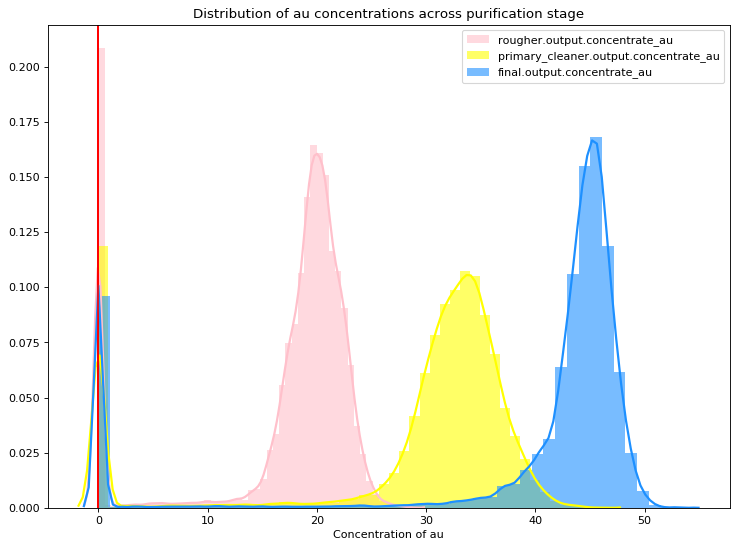

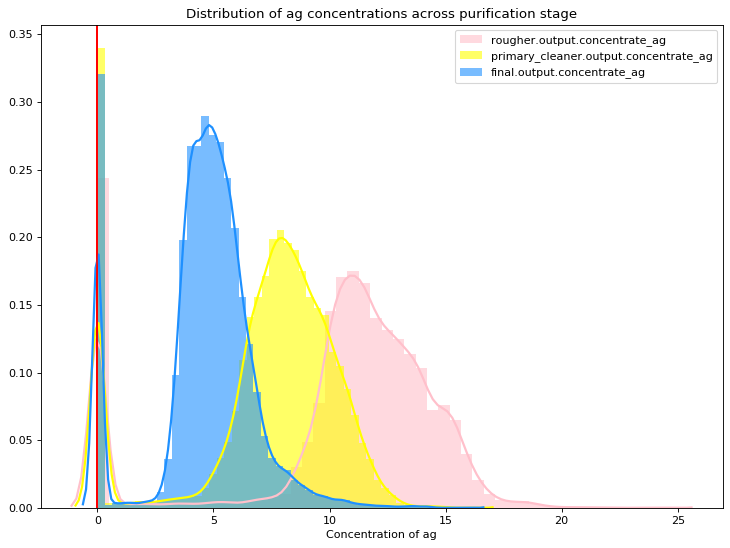

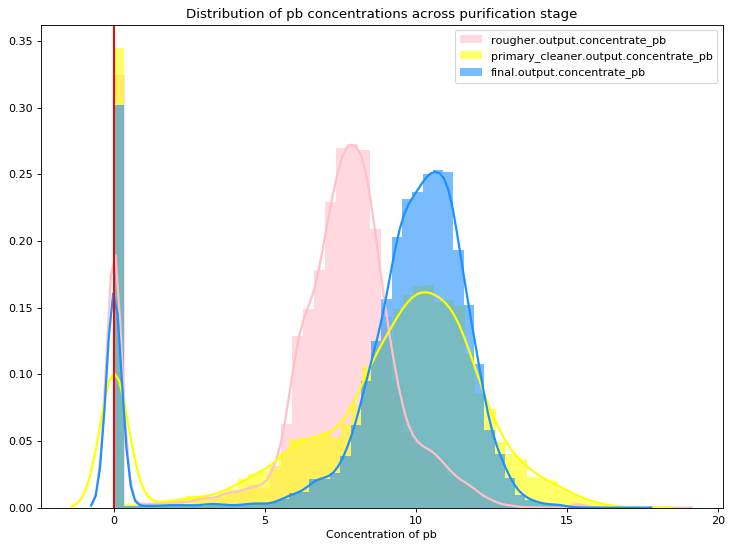

In [27]:
plot_distribution(df_train)

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
An excellent graphs 👍👍👍
</div>

**Conclusion**

- We can see from those plots that:
    - the concentration of gold (au) increased from `rougher.output` to `final.output`
    - which means that the process of purification is working as it should
    - the concentration of other metals decreased like (ag), or stay same suck as (pb)

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you clearly described changes in concentrations.
</div>

**Compare the feed particle size distributions in the training set and in the test set**

In [28]:
#plot distribution of feed particle size
def plot_particle_size_distribution(df):
    kwargs = dict(hist_kws={'alpha': 0.5}, kde_kws={'linewidth':2})
    plt.figure(figsize=(10,6), dpi=80)
    for features, colour, labels in zip(input_feed, xcolors, xlabel_):
        sns.distplot(features, color=colour, label=labels, **kwargs)
        plt.axvline(0, c="r")
    plt.title('Feed particle size distribution for '+ [x.split('__', 1)[1] for x in xlabel_][0])
    plt.xlabel('Distribution of feed particle size')
    plt.legend();

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please note that as Data Scientist you should describe graphs in details and make a corresponding conclusion. Here it will be nice to describe the type of distribution, an outliers and so on. Please note that this applies to all other graphs too.
    
Please see the following link how graphs can be described: http://explainwell.org/index.php/table-of-contents-handle-numbers/phrases-and-6-analysis-steps-to-interpret-a-graph/
</div>

In [29]:
# average particle size for train set
rougher_input_train = df_train['rougher.input.feed_size'].mean()
rougher_input_test = df_test['rougher.input.feed_size'].mean()
# average particle size for test set
primary_cleaner_input_train, primary_cleaner_input_test = df_train['primary_cleaner.input.feed_size'].mean(), df_test['primary_cleaner.input.feed_size'].mean()

print('Average particle size for rougher input train set is {:.2f}'.format(rougher_input_train))
print('Average particle size for primary cleaner input train set is {:.2f}'.format(primary_cleaner_input_train))
print()
print('Average particle size for rougher input test set is {:.2f}'.format(rougher_input_test))
print('Average particle size for primary cleaner input test set is {:.2f}'.format(primary_cleaner_input_test))

Average particle size for rougher input train set is 60.19
Average particle size for primary cleaner input train set is 7.30

Average particle size for rougher input test set is 55.90
Average particle size for primary cleaner input test set is 7.26


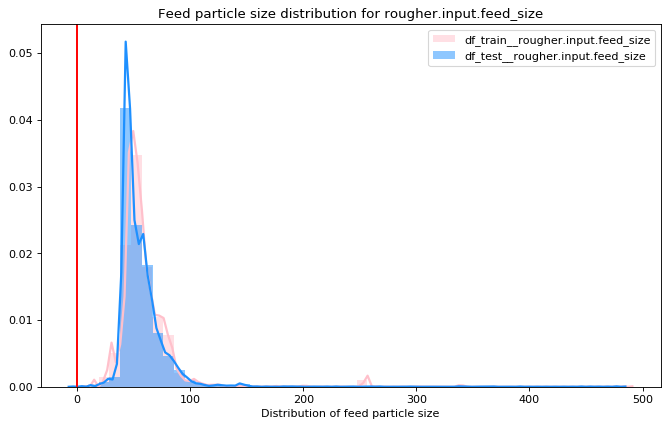

In [30]:
input_feed = [df_train['rougher.input.feed_size'], df_test['rougher.input.feed_size']]
xlabel_ = ['df_train__rougher.input.feed_size', 'df_test__rougher.input.feed_size']
xcolors = ['pink', 'dodgerblue']
plot_particle_size_distribution(df_train)

- We can see that the average particle size for train and test sets is 60 and 56 respectively for rougher.input.feed_size. 
- the particle size distributions are similar. 

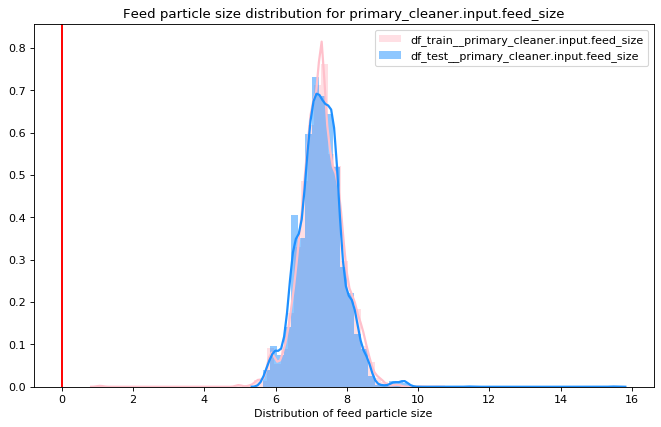

In [31]:
input_feed = [df_train['primary_cleaner.input.feed_size'], df_test['primary_cleaner.input.feed_size']]
xlabel_ = ['df_train__primary_cleaner.input.feed_size', 'df_test__primary_cleaner.input.feed_size']
xcolors = ['pink', 'dodgerblue']
plot_particle_size_distribution(df_test)

- We can see that the average particle size for train and test sets is 7.30 and 7.26 respectively for primary_cleaner.input.feed_size. Which means that they are almost similar
- the particle size distributions look similar too

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
It's great that you clearly analysed graphs 👍👍👍
</div>

**Conclusion**

From our comparison of the feed particle size distribution for for the training and the test set, we can say that distribution hasnt any significant variation, which means that the model evaluation is correct

From this we conclude that we can proceed to the training and testing on the dataset(df_train, df_test) with no problem.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
You correctly noted that the distributions look similar, but please calculate the average particle size for train and test.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
You are right, particles from train and test have almost the same size.
</div>

**Do you notice any abnormal values in the total distribution?**

- Let's check if there is any anomalies in total distribution of all substances at different stages

In [32]:
#rougher.input.feed
df_full['rougher.input.feed.total_concentration'] = df_full[['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']].sum(axis=1)

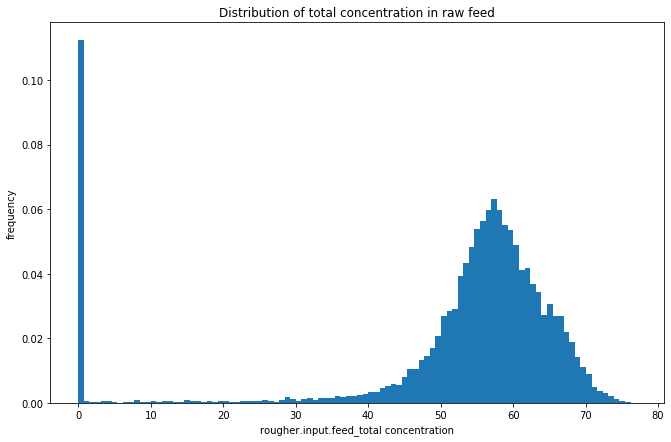

In [33]:
#are there any anomalies
stage_1_total_conc = df_full['rougher.input.feed.total_concentration']
plt.figure(figsize=(11,7))
plt.hist(stage_1_total_conc, density=True, bins=100)
plt.xlabel('rougher.input.feed_total concentration')
plt.ylabel('frequency')
plt.title("Distribution of total concentration in raw feed");

- This plot represents the distribution of total concentration in the raw feed. 
- We can clearly see that the distribution is skewed left
- also we have a pick around 0

Which means that we clearly have anomaly or outlier in the data that should be removed.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please add descriptions to the graphs?
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you correctly noted a large amount of an anomaly values at zero point. Yes, the distribution is skewed to the left.
</div>

In [34]:
#rougher.output.concentrate
df_full['rougher.output.concentrate.total_concentration'] = df_full[['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']].sum(axis=1)

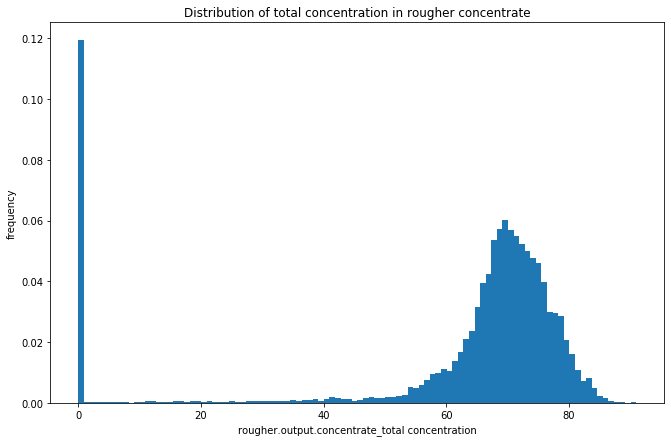

In [35]:
##are there any anomalies
stage_2_total_conc = df_full['rougher.output.concentrate.total_concentration']
plt.figure(figsize=(11,7))
plt.hist(stage_2_total_conc, density=True, bins=100)
plt.xlabel('rougher.output.concentrate_total concentration')
plt.ylabel('frequency')
plt.title("Distribution of total concentration in rougher concentrate");

Same thing for this graph:

- This plot represents the distribution of total concentration in rougher concentrate 
- We can clearly see that the distribution is skewed left
- also we have a pick around 0

Which means that we clearly have anomaly or outlier in the data that should be removed.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, you are right :)
</div>

In [36]:
#final.output.concentrate
df_full['final.output.concentrate.total_concentration'] = df_full[['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']].sum(axis=1)

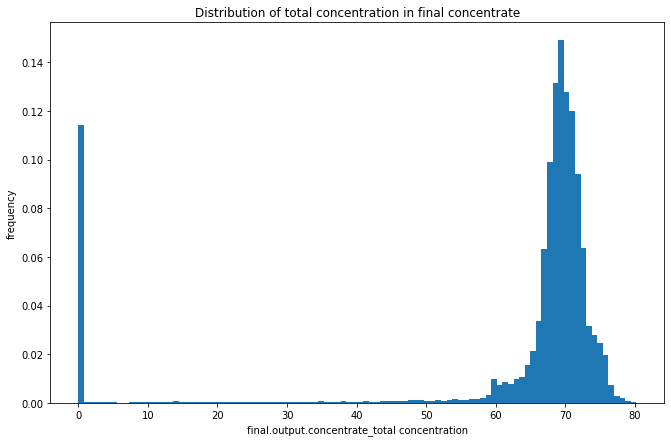

In [37]:
##are there any anomalies
stage_3_total_conc = df_full['final.output.concentrate.total_concentration'] 
plt.figure(figsize=(11,7))
plt.hist(stage_3_total_conc, density=True, bins=100)
plt.xlabel('final.output.concentrate_total concentration')
plt.ylabel('frequency')
plt.title("Distribution of total concentration in final concentrate");

Same thing for this graph:

- This plot represents the distribution of total concentration in final concentrate 
- We can clearly see that the distribution is skewed left
- also we have a pick around 0 (anomaly/outlier)

Which means that we clearly have anomaly or outlier in the data that should be removed.

**Conclusion**

After ploting histograms, 
- We see a peak around zero in all the 3 plots, it is obvious that these are anomalies, since it cant be that the concentrations of all substances together at some stage were equal to zero.
- A possible cause of anomalies is errors that could accure from the system equipments, and the data was recorded in this form and cannot be reloaded... of simply the data was loaded under unusual conditions.
- In all cases, what we are sure about is that we should get rid of those anomalies/outliers. To do that we will remove them by setting a treshold of 0.8 & 0.95

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please explain a possible reasons of zero values of concentrations?
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, zero values in the concentrations can be due the technical problems with measurements or technical errors.
</div>

In [38]:
# filtered full dataset without anomaly
df_full_data = df_full[(df_full['rougher.input.feed.total_concentration'] > 0.8) & 
                                        (df_full['rougher.output.concentrate.total_concentration'] > 0.95) & 
                                        (df_full['final.output.concentrate.total_concentration'] > 0.8)]
print('The shape of the new dataset is: ', format(df_full_data.shape))
print()
df_full_data.describe()

The shape of the new dataset is:  (19904, 90)



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed.total_concentration,rougher.output.concentrate.total_concentration,final.output.concentrate.total_concentration
count,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,...,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000,19904.000000
mean,5.250317,10.005729,9.437927,44.024213,67.274249,9.722925,2.695731,10.405297,3.059586,143.984616,...,-461.784848,15.670516,-488.682801,12.217680,-487.183956,18.941251,-505.444267,57.056355,69.231266,68.718185
std,1.427628,1.575505,2.882103,4.686102,9.619950,2.396828,0.980749,3.041419,0.971711,45.810767,...,66.674388,5.510786,35.460418,5.307127,39.196781,5.541075,38.854243,7.863282,9.231440,6.498115
min,0.000000,0.135894,0.000000,0.225775,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464,0.913565,1.064979,0.835351
25%,4.278200,9.146978,7.629914,43.275641,63.350638,8.077092,2.023136,8.763196,2.463490,113.362840,...,-500.187016,10.988093,-500.458352,8.977880,-500.130066,14.983458,-500.739496,53.372708,66.195289,67.860212
50%,5.108484,10.105279,9.191454,44.936239,68.236471,9.809782,2.739593,10.527450,2.996648,143.095289,...,-499.473279,14.997593,-499.793222,11.021120,-499.934117,19.955170,-500.047765,57.549919,70.342238,69.554069
75%,5.952000,11.043546,10.969702,46.231796,72.741328,11.217990,3.344845,12.029298,3.588434,175.275803,...,-400.144280,18.025555,-498.348094,14.017480,-499.431386,23.991131,-499.481118,61.988720,74.598470,71.344193
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,265.983123,...,-7.834746,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459,76.978947,90.964431,80.210644


- `date` = the index of the datasets

In [39]:
# make date column the index in dataset
df_test.set_index('date', inplace=True)
df_train.set_index('date', inplace=True)
df_full_data.set_index('date', inplace=True)

- Using this new index is helping us to filter the `df_full` to a new train dataset by looking for the index of the train set that can be found in the full set.
- which helps us to otain a train set without anomalies

In [40]:
# index of train set in full dataset
df_train_data_index = df_full_data.index.intersection(df_train.index)
df_train_data_index.shape

(14614,)

In [41]:
# resulting train set
df_train_data = df_full_data.loc[df_train_data_index]
df_train_data.reset_index(inplace=True)
df_train_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed.total_concentration,rougher.output.concentrate.total_concentration,final.output.concentrate.total_concentration
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,51.680034,66.424950,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,50.659114,67.012710,63.957723
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,50.609929,66.103793,64.311180
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,51.061546,65.752751,63.573449
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,47.859163,65.908382,64.004667


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
👍👍👍
</div>

- We do the same process at the test dataset

In [42]:
# index of test set in full dataset
df_test_data_index = df_full_data.index.intersection(df_test.index)
df_test_data_index.shape

(5290,)

In [43]:
#resulting test set
df_test_data = df_full_data.loc[df_test_data_index]
df_test_data.reset_index(inplace=True)
df_test_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed.total_concentration,rougher.output.concentrate.total_concentration,final.output.concentrate.total_concentration
0,2016-09-01 00:59:59,7.578381,10.466295,11.990938,40.743891,70.273583,12.688885,3.844413,11.075686,4.537988,...,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,72.871822,79.939838,70.779504
1,2016-09-01 01:59:59,7.813838,10.581152,12.216172,39.604292,68.910432,12.829171,3.918901,11.132824,4.675117,...,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,71.669225,81.118880,70.215454
2,2016-09-01 02:59:59,7.623392,10.424024,12.313710,40.724190,68.143213,12.977846,4.026561,10.990134,4.828907,...,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,73.202598,79.267044,71.085315
3,2016-09-01 03:59:59,8.552457,10.503229,13.074570,39.290997,67.776393,12.451947,3.780702,11.155935,4.969620,...,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,70.757057,81.335254,71.421253
4,2016-09-01 04:59:59,8.078781,10.222788,12.475427,40.254524,61.467078,11.827846,3.632272,11.403663,5.256806,...,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,68.654396,80.902631,71.031520


**Conclusion**

From the previous analysis, we can conclude that:
- for the distribution of metals across purification stage, 
    - the concentration of gold (au) increased from `rougher.output` to `final.output`. Which means that the process is working as it should be
- After comparing the feed particle size distribution for both training and test sets, we noticed that the distributions are almost similar
- After seeking if there is any anomalies, we've seen an abnormal peak value around 0
    - using a treshold of 0.8 & 0.95, we removed those anomalies
- and finaly using `date` column as an index for the resulting datasets

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Good job that you summed up main results of this part of the project.
</div>

# <a id="3">Build the model

**Calculate the final sMAPE value using the following formulas**
$$ Final~sMAPE = 25\% * sMAPE(rougher) + 75\% * sMAPE(final) $$ 

In [44]:
# function to compute the sMAPE
def smape(y_true, y_pred):
    smape = (np.abs(y_true - y_pred)/((np.abs(y_true) + np.abs(y_pred))/2)).mean()
    return smape

# function to calculate the final sMAPE value
def smape_final(y_true, y_pred):
    smape_out_rougher = smape(y_true[:,0], y_pred[:,0])
    smape_out_final =smape(y_true[:,1], y_pred[:,1])
    return (0.25 * smape_out_rougher) + (0.75 * smape_out_final)

# user-defined scoring function
smape_score = make_scorer(smape_final)

In [45]:
# declare variables for features and target
features_train = df_train_data.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
features_test = df_test_data.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train = df_train_data[['rougher.output.recovery', 'final.output.recovery']]
target_test = df_test_data[['rougher.output.recovery', 'final.output.recovery']]

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Ok :)
</div>

- Features scaling

In [46]:
# features scaling
scaler = StandardScaler()
scaler.fit(features_train)
# transform the training set and the test set using transform()
features_train = scaler.transform(features_train)
features_test  = scaler.transform(features_test)

# target data as numpy array
target_train = target_train.values
target_test = target_test.values

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you have used features scaling.
    
Maybe this link will be interesting for you: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/ 
</div>

**Baseline Model**

In [47]:
# baseline model using a dummy regressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train, target_train)
dummy_regr_test_predictions = dummy_regr.predict(features_test)

In [48]:
# evaluate baseline model
print('{:.3}'.format(smape_final(target_test, dummy_regr_test_predictions)))

0.0833


<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
Please note that you can use .format to output only required number of decimal places (https://pyformat.info/).
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Good job for using formatting of the data output.
</div>

- We can improve the score of the final sMAPE by developing other models and tuning the hyperparameters.

**Linear Regression**

In [49]:
# build model
start_time = timeit.default_timer()
lr_regr = LinearRegression().fit(features_train, target_train) # train the model 
lr_regr_test_predictions = lr_regr.predict(features_test)

# cross-validation for linear model
cv_score_lr = cross_val_score(lr_regr, features_train, target_train, cv=5, scoring=smape_score)
print('Mean smape:  {:.2%}'.format(cv_score_lr.mean()))
print('sMAPE range of values are: ', cv_score_lr)
print()
print('Execution time: ' + str((timeit.default_timer() - start_time)) + ' mins')

Mean smape:  4.55%
sMAPE range of values are:  [0.05369331 0.0354282  0.04232437 0.03861486 0.05744188]

Execution time: 2.4286362305283546 mins


In [50]:
# compute final smape for linear regression
print('The final sMAPE score is: {:.2%}'.format(smape_final(target_test, lr_regr_test_predictions)))

The final sMAPE score is: 3.07%


- We can see that the final sMAPE value of Linear Regression model is 3.07%, with an execution time of 2.8 min
- let's see if we can improve more with other algorithms

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please add short description to each of the models (hyperparameters, metric and so on)?
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done that you clearly described the model.
</div>

**Random Forest Regression**

In [51]:
# build random forest regression model
start_time = timeit.default_timer()
rf_regr = RandomForestRegressor().fit(features_train, target_train) # train the model 
rf_regr_test_predictions = rf_regr.predict(features_test)

# cross-validation for random forest regression
cv_score_rf = cross_val_score(rf_regr, features_train, target_train, cv=5, scoring=smape_score)
print('Mean smape:  {:.2%}'.format(cv_score_rf.mean()))
print('sMAPE range of values are: ', cv_score_rf)
print()
print("Execution time: " + str((timeit.default_timer() - start_time)/60) + ' mins')

Mean smape:  3.89%
sMAPE range of values are:  [0.04828884 0.04102082 0.03236552 0.03158435 0.04123971]

Execution time: 0.7596630344788233 mins


In [52]:
# compute final smape for random forest
print('The final sMAPE score is: {:.2%}'.format(smape_final(target_test, rf_regr_test_predictions)))

The final sMAPE score is: 2.30%


**Random forest with hyperparameter tuning**

In [53]:
# define the cross validation scheme
for i in [10, 25, 50]:
    rf = RandomForestRegressor(n_estimators = i, random_state = 12345)
    rf.fit(features_train, target_train)
    cross_val_scores_rf = cross_val_score(rf, features_train, target_train, cv=5, scoring=smape_score)
    print('n_estimators: ' + str(i) + ', Mean smape: {:.4%}'.format(cross_val_scores_rf.mean()))

n_estimators: 10, Mean smape: 3.9401%
n_estimators: 25, Mean smape: 3.4874%
n_estimators: 50, Mean smape: 3.3105%


In [54]:
start_time = timeit.default_timer()
# hyperparameter optimization

# define hyperparameters to tune
grid = {
    "n_estimators" : [10, 25, 50]
}
# define the model 
regressor = RandomForestRegressor(random_state = 12345)
# define the grid search
grid_search_rf = GridSearchCV(estimator = regressor, param_grid = grid, scoring=smape_score)
# execute search
grid_search_rf.fit(features_train, target_train)
# summarize result
print('The best hyperparameters are: {}'.format(grid_search_rf.best_params_))
print()
print("Execution time: " + str((timeit.default_timer() - start_time)/60) + ' mins')

The best hyperparameters are: {'n_estimators': 10}

Execution time: 2.7381610312809546 mins


In [55]:
# create the random forest regressor model
def random_forest_regressor(X_train, y_train, X_test, y_test):
    """
    This is a random forest regressor function developed to train
    the model, make prediction on testing dataset, 
    and compute evaluation metrics for testing datasets
    """
    # build the model
    model = RandomForestRegressor(**grid_search_rf.best_params_)
    model.fit(X_train, y_train) # train the model 
    # make predictions on testing set
    rf_test_predictions = model.predict(X_test)
    
    # compute final smape for random forest
    print('The final sMAPE is: {:.2%}'.format(smape_final(target_test, rf_test_predictions)))

In [56]:
# determine final sMAPE for random forest regressor
random_forest_regressor(features_train, target_train, features_test, target_test)

The final sMAPE is: 2.24%


For the RF:
- we used grid search to find the hyperparameters for the random forest algorithm
- We have obtained a sMAPE of 2.36% before the hyperparams tunning
- sMAPE of 2.28% after hyperparams tunning

the sMAPE score slightly improved but no significant change.

**Decision Tree Regression**

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
Please note that you can avoid warnings (if necessary) by using the code below.
</div>

In [57]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [58]:
# build decision tree regression model
start_time = timeit.default_timer()
dt_regr = DecisionTreeRegressor().fit(features_train, target_train) # train the model 
dt_regr_test_predictions = dt_regr.predict(features_test)

# cross-validation for decision tree regression
cv_score_dt = cross_val_score(dt_regr, features_train, target_train, cv=5, scoring=smape_score)
print('Mean smape:  {:.4%}'.format(cv_score_dt.mean()))
print('sMAPE range of values are: ', cv_score_dt)
print()
print("Execution time: " + str((timeit.default_timer() - start_time)/60) + ' mins')

Mean smape:  nan%
sMAPE range of values are:  [0.0704108         nan        nan        nan 0.06151426]

Execution time: 0.12560010266800722 mins


In [59]:
# compute final smape for decision tree model
print('The final sMAPE score is: {:.2%}'.format(smape_final(target_test, dt_regr_test_predictions)))

The final sMAPE score is: 3.69%


**Decision Tree with hyperparameter**

In [60]:
# define the cross validation scheme
for i in [2, 4, 8, 16]:
    dt = DecisionTreeRegressor(max_depth = i, random_state = 12345)
    dt.fit(features_train, target_train)
    cross_val_scores_dt = cross_val_score(dt, features_train, target_train, cv=5, scoring=smape_score)
    print('Max depth: ' + str(i) + ', Mean smape: {:.4%}'.format(cross_val_scores_dt.mean()))

Max depth: 2, Mean smape: 9.4577%
Max depth: 4, Mean smape: 8.2789%
Max depth: 8, Mean smape: nan%
Max depth: 16, Mean smape: nan%


In [61]:
start_time = timeit.default_timer()
# hyperparameter optimization

# define hyperparameters to tune
params_ = {
    "max_depth" : [2, 4, 8, 16],
    "min_samples_split" : [2, 4, 8, 16]
    }
# define the model
dt_regressor = DecisionTreeRegressor()

# define the grid search
grid_search_dt = GridSearchCV(estimator = dt_regressor, param_grid = params_, scoring=smape_score)
# execute search
grid_search_dt.fit(features_train, target_train)
# summarize result
print('The best hyperparameters are: {}'.format(grid_search_dt.best_params_))
print()
print("Execution time: " + str((timeit.default_timer() - start_time)/60) + ' mins')

The best hyperparameters are: {'max_depth': 2, 'min_samples_split': 8}

Execution time: 0.4019886904706558 mins


In [62]:
# create the decision tree regressor model
def decision_tree_regressor(X_train, y_train, X_test, y_test):
    """
    This is a decision tree regressor function developed to train
    the model, make prediction on testing dataset, 
    and compute evaluation metrics for testing datasets
    """
    # build the model
    dt_model = DecisionTreeRegressor(**grid_search_dt.best_params_)
    dt_model.fit(X_train, y_train) # train the model 
    # make predictions on testing set
    dt_test_predictions = dt_model.predict(X_test)
    
    # compute final smape for decision tree regressor
    print('The final sMAPE is: {:.2%}'.format(smape_final(target_test, dt_test_predictions)))

In [63]:
# determine final sMAPE for decision tree regressor
decision_tree_regressor(features_train, target_train, features_test, target_test)

The final sMAPE is: 7.34%


- For the DT, we obtained an
    - sMAPE = 3.69%	before hyperparams tunning
    - sMAPE = 7.34% after hyperparams tunning
- We can see that the hyperparameter tunning does not always help to improve the model's results.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
👍👍👍
</div>

**And this is a summary of our results**

|**Regressor**| **Final sMAPE without tuning**  | **Final sMAPE with tuning**  |
|---|---|---|
| Dummy	|8.33%  | -	|
| LinearRegressor| 3.07% | - |
| RandomForest| 2.36% | 2.28% |
| DecisionTree| 3.69% | 7.34% |

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Good job that you summed up results of analysis of the models in the summary table.
</div>

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Please see additional materials for models development: https://milkandhoney.ai/insights/best-practice-approach-to-machine-learning-model-development 
</div>

# <a id="4">Overall conclusion

The business objectif of this project is to simulate the gold recovery process from gold ore, predict the amount of gold recovered and optimize gold production for the Zyfra Group.
- In the first part, we downloaded the 3 datasets and investigated the general information.
- we found missing values in the 3 datasets, and figured out that we have to cast `date` column type into datetime.
- we checked after that if recovery is calculated correctly. Using the training set, we've calculated recovery for the rougher.output.recovery feature, find that:
    - the `calculated_recovery` and `rougher.output.recovery` have similar values.
    - The MAE score is 0.0. Which means that the calculated value from the simulated recovery process is similar to the `rougher.output.recovery`
- we've analyze the features not available in the test set. and concluded that:
    - we have 34 features in the train set that are not available in the test set.
    - The features not available in the test set include features containing the concentration of metals (Au, Ag, Pb).
    - The parameters type are output - product parameters and calculation characteristics.
- We jumped after that to the data preprocessing part:
    - Got rid of missing values in the 3 datasets using the forward fill method in pandas.
    - We also converted `date` type to the datatime type in the 3 datasets.
- In the data analysis step, we checked 
    - how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage. To do so, we've ploted the distribution of concentrations across each stage. And concluded that 
        - the concentration of gold (au) increased from `rougher.output` to `final.output`, which means that the process of purification is working as it should. Also, the concentration of other metals decreased like (ag), or stay same suck as (pb).
     - We compared the feed particle size distributions in the training set and in the test set, and ploted the particle_size_distribution for both the train and test sets and found that, 
        - the particle size distributions are similar
        - the distribution hasnt any significant variation, which means that the model evaluation is correct
        - which means that we can proceed to the training and testing on the dataset(df_train, df_test) with no problem.
      - We checked after that if there is any anomalies in total distribution of all substances at different stages, by ploting the distribution of total concentration in raw feed/rougher concentrate/final concentrate. We found a peak around zero, which show the existance anomalies. We removed them by setting a treshold of 0.8 & 0.95.
          - we used new index `date` to filter the `df_full` set to a new train dataset by looking for the index of the train set that can be found in the full set. This process helps us to otain a train set without anomalies, and we did the same to the test set. 
- In model building part, 
    - we wrote a function to calculate the final sMAPE value. 
    - We trained different models, made an evaluation using cross-validation, and hyperparameter tuning. 
    - We tested the model, and observed that the best performing model is :
        - the Random Forest Regressor with an sMAPE of 2.36% before the hyperparams tunning and sMAPE of 2.28% after hyperparams tunning. 
    - We've seen that the hyperparams tunning did not help much to improve(minimize)the sMAPE score.
                   
The Random Forest Model is the best model to predict the amount of gold recovered and optimize gold production.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
You have made an excellent conclusion. Well done that you described it as a logical sequence of actions.
</div>